Problem statement:
There is some online food ordering company like foodpanda ( here restaurants are registered and customers can order online from those restaurants via platfrom also they partner with certain delivery partners to deliver food)
Recently certain social media campaigns and delays in orders due to rain seasons has hampered the brand image
orders are down and margins have tighten up
this projects takes on the challenge to look at where and how much damage has been done
what is technical root of damage and how to make a comeback in certain conditions
and much more

dataset: explained in metadata.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


lets load data and have a quick look at it

In [3]:
customer = pd.read_csv('rpc_18_inputs_for_participants//rpc_18_inputs_for_participants//RPC_18_Datasets//dim_customer.csv')
customer.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [4]:
customer.info()

<class 'pandas.DataFrame'>
RangeIndex: 107776 entries, 0 to 107775
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   customer_id          107776 non-null  str  
 1   signup_date          107776 non-null  str  
 2   city                 107776 non-null  str  
 3   acquisition_channel  107776 non-null  str  
dtypes: str(4)
memory usage: 3.3 MB


lets write a function to perform all these basic functions on all data tables to avoid manual labor

tables = []'dim_customer.csv

In [18]:
tables = ['dim_customer','dim_delivery_partner_','dim_menu_item','dim_restaurant','fact_delivery_performance','fact_order_items','fact_orders','fact_ratings']

In [19]:
def print_unique_values(df):
    for col in df.columns:
        print(df[[col]].value_counts())

In [20]:
def load_data(table):
    df = pd.read_csv(f'rpc_18_inputs_for_participants//rpc_18_inputs_for_participants//RPC_18_Datasets//{table}.csv')
    return df

In [21]:
def table_intro(table):
    print(f"\n\n -------- Basic details of {table} ------")
    df = load_data(table)
    print(df.head())
    print(f'\n---- NULLs ----')
    print(df.isna().sum())
    print(f'\n---- Info ----')
    print(df.info())
    print(f'\n---- describe ----')
    print(df.describe())
    print(f'\n---- unique values ----')
    print(print_unique_values(df))


# Explore with help of visualization and above created function for basic detaisls to build insights


In [22]:
print(tables)

['dim_customer', 'dim_delivery_partner_', 'dim_menu_item', 'dim_restaurant', 'fact_delivery_performance', 'fact_order_items', 'fact_orders', 'fact_ratings']


first lets look at customer table

In [23]:
customer = load_data('dim_customer')
customer.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [31]:
def count_plot(df,col,hue=None):
    ax = sns.countplot(data = df, x = col,hue=hue)
    ax.tick_params(axis='x',rotation=45)
    for container in ax.containers:
        ax.bar_label(container,label_type='edge')
    plt.grid(alpha=0.5)
    plt.title(f'{col} ')
    plt.show()

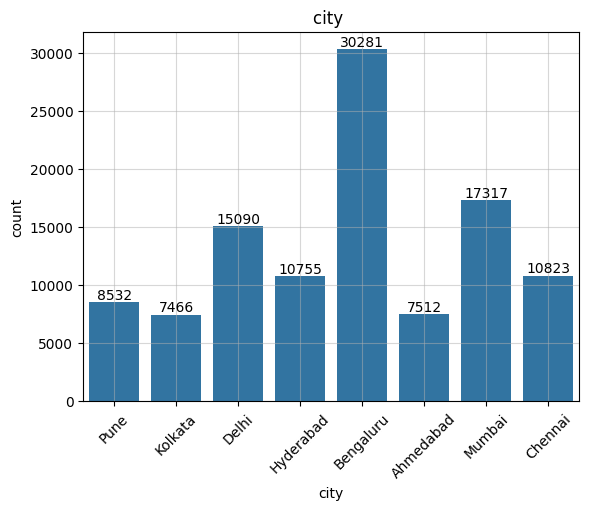

In [25]:
count_plot(customer,'city')

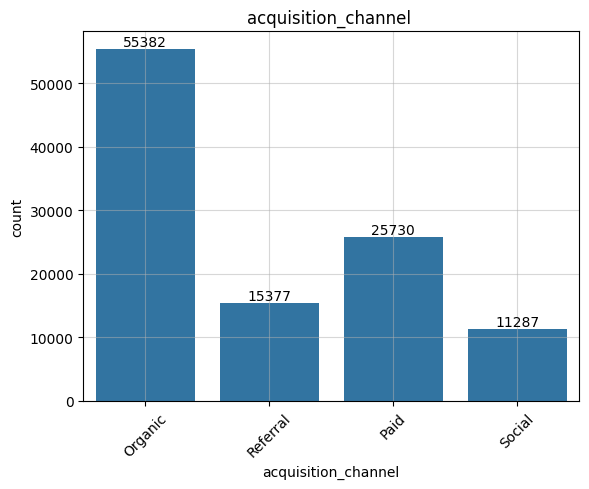

In [26]:
count_plot(customer,'acquisition_channel')

In [27]:
delivery_partner = load_data(tables[1])

In [28]:
table_intro(tables[1])



 -------- Basic details of dim_delivery_partner_ ------
  delivery_partner_id partner_name       city vehicle_type employment_type  \
0             DP09615       Neha E  Bengaluru      Scooter       Full-time   
1             DP02021       Neha V  Bengaluru         Bike       Full-time   
2             DP05541      Vikas S      Delhi        Cycle       Part-time   
3             DP13859       Amit B      Delhi        Cycle       Part-time   
4             DP08091      Arjun R     Mumbai          Car       Full-time   

   avg_rating is_active  
0        3.77         Y  
1        3.90         Y  
2        3.33         Y  
3        4.07         N  
4        4.63         Y  

---- NULLs ----
delivery_partner_id    0
partner_name           0
city                   0
vehicle_type           0
employment_type        0
avg_rating             0
is_active              0
dtype: int64

---- Info ----
<class 'pandas.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):

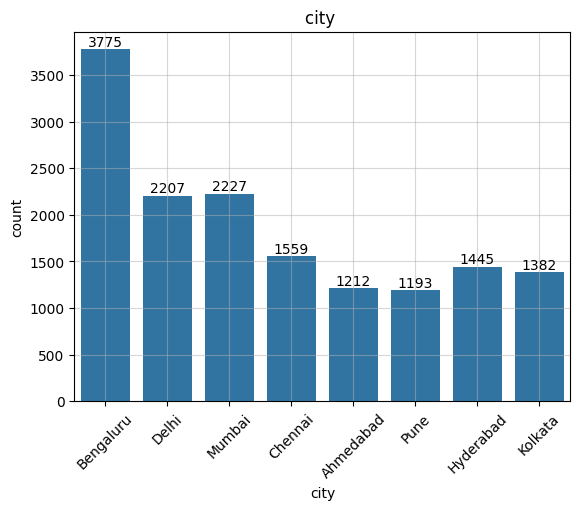

In [29]:
count_plot(delivery_partner,'city')

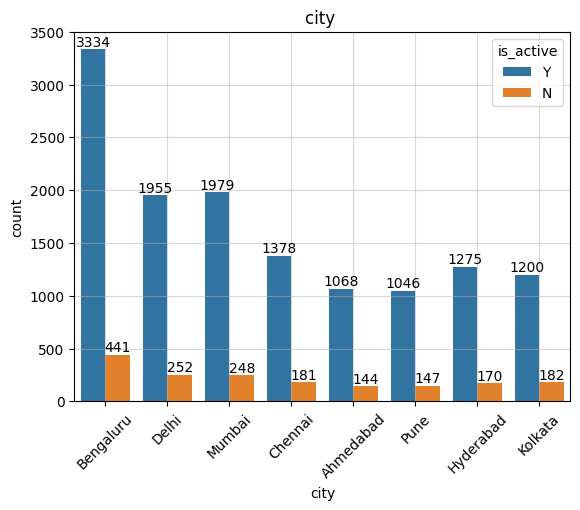

In [33]:
count_plot(delivery_partner,'city',hue='is_active')

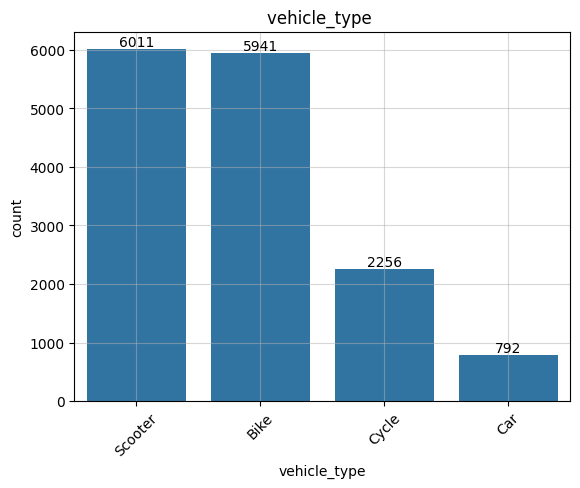

In [30]:
count_plot(delivery_partner,'vehicle_type')

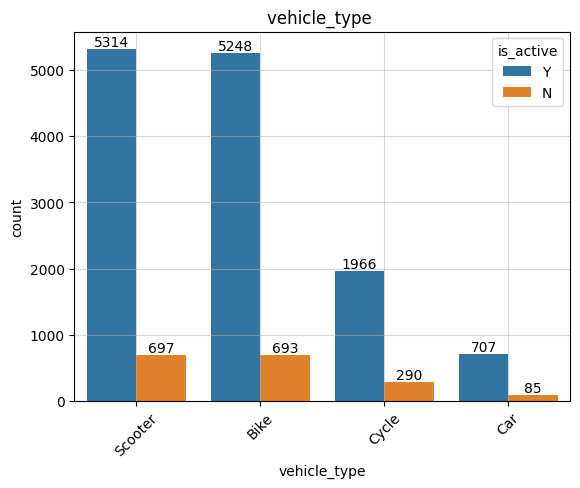

In [32]:
count_plot(delivery_partner,'vehicle_type','is_active')

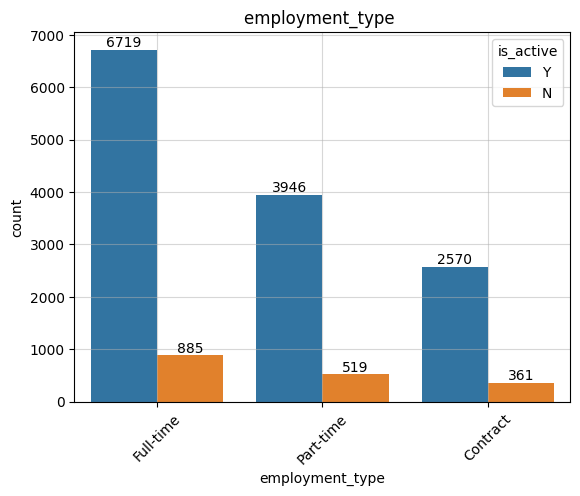

In [34]:
count_plot(delivery_partner,'employment_type',hue='is_active')

<Axes: xlabel='avg_rating', ylabel='Count'>

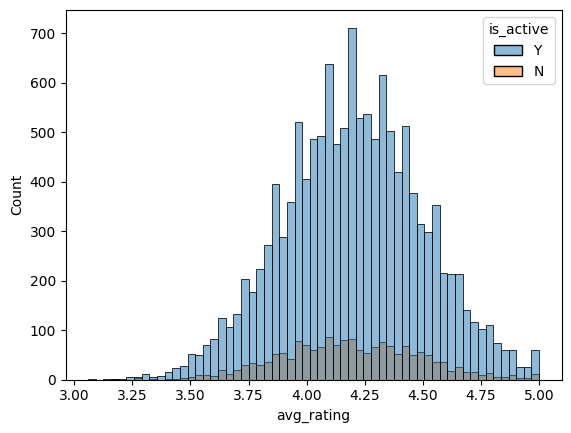

In [36]:
sns.histplot(data=delivery_partner,x='avg_rating',hue='is_active')

In [37]:
menu_item = load_data(tables[2])

In [38]:
table_intro(tables[2])



 -------- Basic details of dim_menu_item ------
     menu_item_id restaurant_id           item_name    category is_veg   price
0  MENU12962_3216     REST12962  Paneer Tikka Pizza       Pizza      Y  271.05
1  MENU12962_1962     REST12962     Pepperoni Pizza       Pizza      N  327.26
2  MENU14069_0510     REST14069      Egg Fried Rice  Fried Rice      N  200.01
3  MENU14069_4308     REST14069        Paneer Tikka    Starters      Y  198.83
4  MENU08622_7574     REST08622        Kadai Paneer     Curries      Y  271.60

---- NULLs ----
menu_item_id     0
restaurant_id    0
item_name        0
category         0
is_veg           0
price            0
dtype: int64

---- Info ----
<class 'pandas.DataFrame'>
RangeIndex: 342671 entries, 0 to 342670
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   menu_item_id   342671 non-null  str    
 1   restaurant_id  342671 non-null  str    
 2   item_name      342671 non-null  

<Axes: xlabel='price', ylabel='Count'>

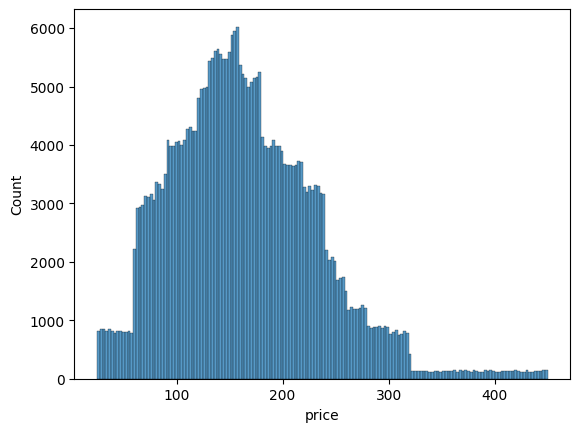

In [39]:
sns.histplot(data=menu_item,x='price')

In [40]:
restuarnat = load_data(tables[3])

In [41]:
table_intro(tables[3])



 -------- Basic details of dim_restaurant ------
  restaurant_id            restaurant_name       city  cuisine_type  \
0     REST12962  Flavours of Sweets Palace  Bengaluru       Chinese   
1     REST14069       Royal Biryani Darbar  Ahmedabad     Fast Food   
2     REST08622          Spicy Wraps Point     Mumbai  North Indian   
3     REST19745       Delhi Express Palace  Ahmedabad         Pizza   
4     REST02383         Namma Mess Delight     Mumbai       Healthy   

    partner_type avg_prep_time_min is_active  
0     Restaurant             26-40         N  
1     Restaurant             16-25         Y  
2     Restaurant             16-25         Y  
3  Cloud Kitchen             16-25         Y  
4     Restaurant             26-40         Y  

---- NULLs ----
restaurant_id        0
restaurant_name      0
city                 0
cuisine_type         0
partner_type         0
avg_prep_time_min    0
is_active            0
dtype: int64

---- Info ----
<class 'pandas.DataFrame'>
RangeI

not much clear explicit information in certain tables regarding business problem lots ot this is to ensure better data understanding

table_intro('fact_delivery_performance')

In [42]:
table_intro('fact_delivery_performance')



 -------- Basic details of fact_delivery_performance ------
          order_id  actual_delivery_time_mins  expected_delivery_time_mins  \
0  ORD202501023439                         31                           31   
1  ORD202501012051                         46                           42   
2  ORD202501019281                         25                           31   
3  ORD202501000124                         29                           41   
4  ORD202501006518                         37                           41   

   distance_km  
0          6.4  
1          1.9  
2          6.2  
3          6.2  
4          2.4  

---- NULLs ----
order_id                       0
actual_delivery_time_mins      0
expected_delivery_time_mins    0
distance_km                    0
dtype: int64

---- Info ----
<class 'pandas.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                    

In [43]:
table_intro('fact_ratings')



 -------- Basic details of fact_ratings ------
          order_id customer_id restaurant_id  rating           review_text  \
0  ORD202501023439  CUST181110     REST08622     4.5   Super fast delivery   
1  ORD202501019281  CUST179306     REST14069     4.5          Great taste!   
2  ORD202501018036  CUST093042     REST13907     5.0   Super fast delivery   
3  ORD202501007724  CUST110825     REST08451     4.0  Tasty but a bit late   
4  ORD202501002349  CUST181669     REST00225     4.4     Satisfied overall   

   review_timestamp  sentiment_score  
0  01-01-2025 15:00             0.75  
1  01-01-2025 15:00             0.75  
2  01-01-2025 14:03             1.00  
3  01-01-2025 14:06             0.50  
4  01-01-2025 14:06             0.70  

---- NULLs ----
order_id            17
customer_id         17
restaurant_id       17
rating              17
review_text         17
review_timestamp    17
sentiment_score     17
dtype: int64

---- Info ----
<class 'pandas.DataFrame'>
RangeIndex: 68

<Axes: xlabel='rating', ylabel='Count'>

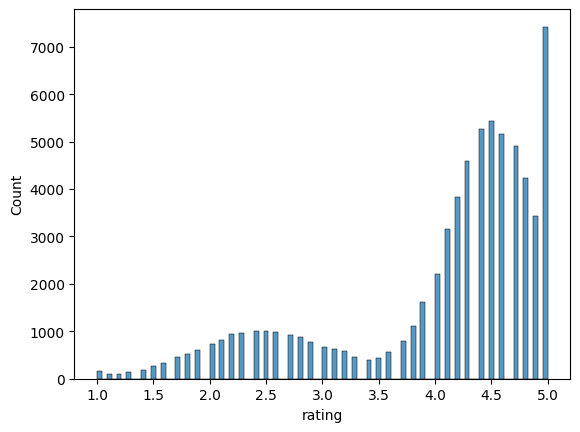

In [44]:
rating = load_data('fact_ratings')

sns.histplot(data=rating,x='rating')

<Axes: xlabel='sentiment_score', ylabel='Count'>

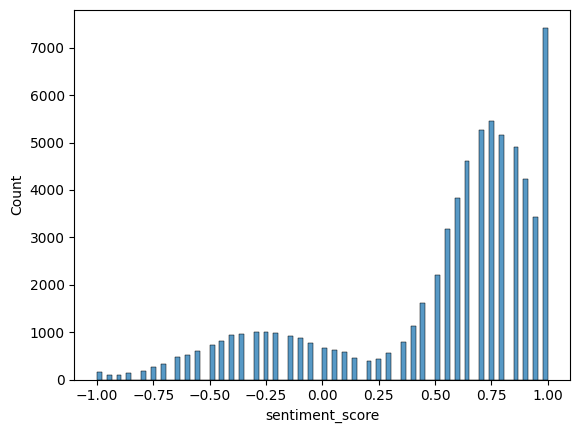

In [45]:
sns.histplot(data=rating,x='sentiment_score')


there are bad new up from sentiment_score and ratings have been quite bad for more than expected order

higher order cities like benglauru or delhi have proportionally low delivery partners than needed

those in lower traffic cities have left the company more in comparison